<a href="https://colab.research.google.com/github/Osas1790/Employees-Prediction/blob/main/Employees_Future_Prediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Employee Future Prediction

##### Importing the Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn import preprocessing 
from category_encoders import *
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

##### Loading DataSet

In [ ]:
df = pd.read_csv("Employee.csv")

In [ ]:
df.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
df.tail()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


##### Performing Exploratory Data Analysis

In [ ]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [ ]:
# checking the dimension of the dataset
df.shape

(4653, 9)

In [ ]:
# checking data type
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [ ]:
# cheking for na/null values in the dataset
df.isna().value_counts()

Education  JoiningYear  City   PaymentTier  Age    Gender  EverBenched  ExperienceInCurrentDomain  LeaveOrNot
False      False        False  False        False  False   False        False                      False         4653
dtype: int64

In [ ]:
df.isna().sum() # checking the total sum of the missing values in each of the variables

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

From the observation above, it shows that there are no missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [ ]:
# checking for Nunique values in the variables
df["Education"].nunique()

3

In [ ]:
df["City"].nunique()

3

In [ ]:
df["JoiningYear"].nunique()

7

In [ ]:
df["EverBenched"].nunique()

2

In [ ]:
# checking for duplicate values
df.duplicated().value_counts()

False    2764
True     1889
dtype: int64

There are 1889 of duplicated values in the dataset

##### Statistical analysis

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
JoiningYear,4653.0,2015.062970,1.863377,2012.0,2013.0,2015.0,2017.0,2018.0
PaymentTier,4653.0,2.698259,0.561435,1.0,3.0,3.0,3.0,3.0
Age,4653.0,29.393295,4.826087,22.0,26.0,28.0,32.0,41.0
ExperienceInCurrentDomain,4653.0,2.905652,1.558240,0.0,2.0,3.0,4.0,7.0
LeaveOrNot,4653.0,0.343864,0.475047,0.0,0.0,0.0,1.0,1.0


In [ ]:
df.skew() # checking skweness 

JoiningYear                 -0.113462
PaymentTier                 -1.709531
Age                          0.905195
ExperienceInCurrentDomain   -0.162556
LeaveOrNot                   0.657631
dtype: float64

In [ ]:
df.kurtosis()

JoiningYear                 -1.204425
PaymentTier                  1.912203
Age                         -0.299823
ExperienceInCurrentDomain   -0.969413
LeaveOrNot                  -1.568196
dtype: float64

In [ ]:
# checking for corralation among the variables
df.corr()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
JoiningYear,1.000000,-0.096078,0.013165,-0.036525,0.181705
PaymentTier,-0.096078,1.000000,0.007631,0.018314,-0.197638
Age,0.013165,0.007631,1.000000,-0.134643,-0.051126
ExperienceInCurrentDomain,-0.036525,0.018314,-0.134643,1.000000,-0.030504
LeaveOrNot,0.181705,-0.197638,-0.051126,-0.030504,1.000000


### Data Visualisation

In [ ]:
df['Education'].value_counts()

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

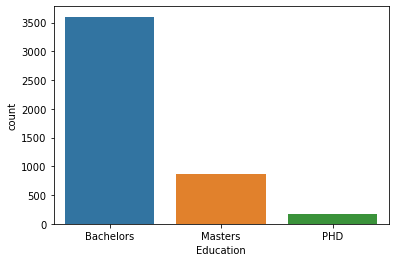

In [ ]:
sns.countplot(x = 'Education', data = df)
plt.show()

From the chart above Employees with Bachelors degree holders are more compare to Master and PHD

In [ ]:
df['JoiningYear'].value_counts()

2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: JoiningYear, dtype: int64

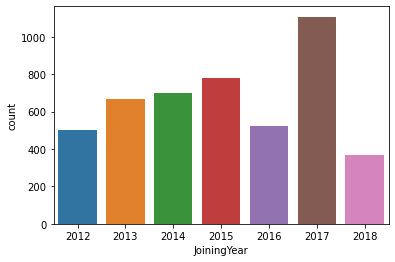

In [ ]:
sns.countplot(x = 'JoiningYear',data = df)
plt.show()

Majority of the employees joining the company in 2017 and 2015.

Majority of the employees joining the company in 2017 and 2015.

In [ ]:
df['City'].value_counts()

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

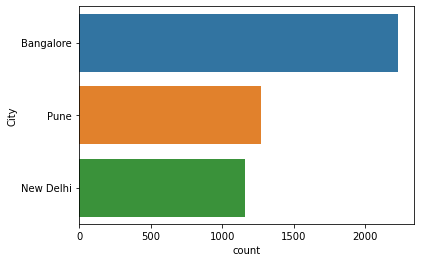

In [ ]:
sns.countplot(y = 'City', data = df)
plt.show()

Majority of the employees in each of the city are from Banglore. Therefor, Banglore has the highest number of employees

In [ ]:
df['PaymentTier'].value_counts()

3    3492
2     918
1     243
Name: PaymentTier, dtype: int64

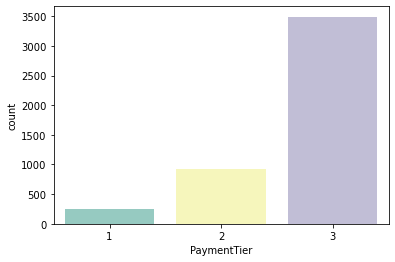

In [ ]:
sns.countplot(x = 'PaymentTier',data = df, palette="Set3")
plt.show()

Over 60% of the Employees belong to tier 3

In [ ]:
df['Gender'].value_counts()

Male      2778
Female    1875
Name: Gender, dtype: int64

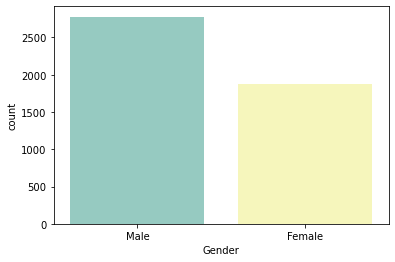

In [ ]:
sns.countplot(x = 'Gender',data = df, palette="Set3")
plt.show()

In [ ]:
df['EverBenched'].value_counts()

No     4175
Yes     478
Name: EverBenched, dtype: int64

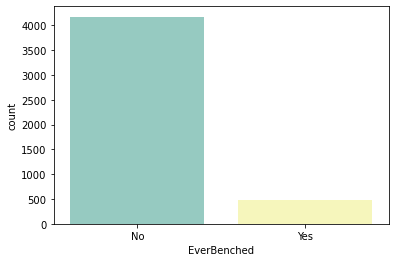

In [ ]:
sns.countplot(x = 'EverBenched',data = df, palette="Set3" )
plt.show()

In [ ]:
df['ExperienceInCurrentDomain'].value_counts()

2    1087
4     931
5     919
3     786
1     558
0     355
7       9
6       8
Name: ExperienceInCurrentDomain, dtype: int64

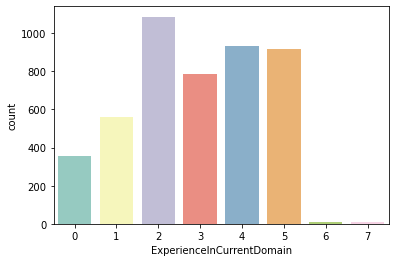

In [ ]:
sns.countplot(x = 'ExperienceInCurrentDomain',data = df, palette="Set3" )
plt.show()

In [ ]:
df['LeaveOrNot'].value_counts()

In [ ]:
sns.countplot(x = 'LeaveOrNot',data = df, palette="Set3" )
plt.show()

From the chart above, it shows that most of the employees are not supposed to leave

###### unique values of each category

In [ ]:
from IPython.core.display import HTML
def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

In [ ]:
df_nunique = {var: pd.DataFrame(df[var].value_counts())
             for var in {'Education', 'JoiningYear', 'City', 'PaymentTier', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'}}
multi_table([df_nunique['Education'], df_nunique['JoiningYear'],df_nunique['City']
            ,df_nunique['PaymentTier'],df_nunique['Gender'],df_nunique['EverBenched'],
             df_nunique['ExperienceInCurrentDomain'],df_nunique['LeaveOrNot']])

,Education
Bachelors,3601
Masters,873
PHD,179
,JoiningYear
2017,1108
2015,781
2014,699
2013,669
2016,525
2012,504


##### categorical variables(grouping)

In [ ]:
df_groupby = {var: pd.DataFrame(df.groupby([var, 'Age']).size()) 
              for var in {'Education', 'JoiningYear', 'City', 'PaymentTier', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'}}
multi_table([df_groupby['Education'], df_groupby['JoiningYear'],df_groupby['City']
            ,df_groupby['PaymentTier'],df_groupby['Gender'],df_groupby['EverBenched'],
             df_groupby['ExperienceInCurrentDomain'],df_groupby['LeaveOrNot']])

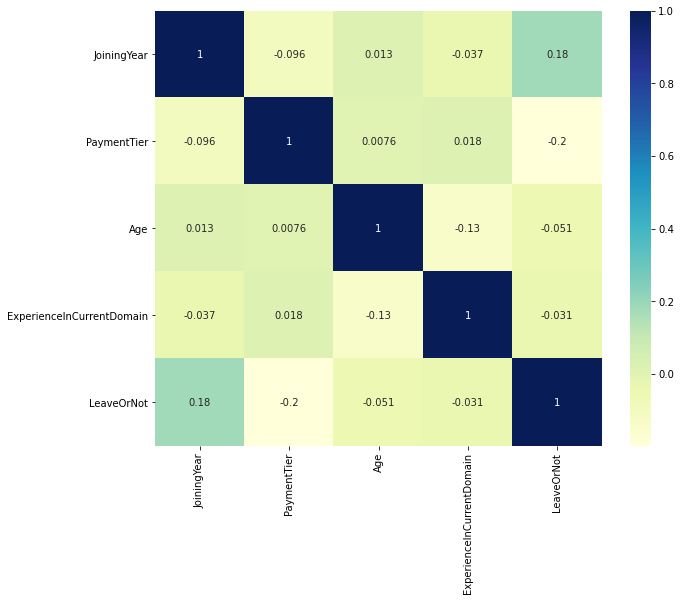

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df.corr(),annot = True,cmap = "YlGnBu")
plt.show()

### Data Preprocessing

In [ ]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

### Encoding the catagorical variables

In [ ]:
df=pd.get_dummies(data=df,columns=['Education','City','Gender','EverBenched'],drop_first=True)
df

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,2017,3,34,0,0,0,0,0,0,1,0
1,2013,1,28,3,1,0,0,0,1,0,0
2,2014,3,38,2,0,0,0,1,0,0,0
3,2016,3,27,5,1,1,0,0,0,1,0
4,2017,3,24,2,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4648,2013,3,26,4,0,0,0,0,0,0,0
4649,2013,2,37,2,1,1,0,0,1,1,0
4650,2018,3,27,5,1,1,0,1,0,1,0
4651,2012,3,30,2,0,0,0,0,0,1,1


### Feature Scaling

In [ ]:
scaler = StandardScaler()
scaler.fit(df.drop('LeaveOrNot',axis = 1))

StandardScaler()

In [ ]:
scaled_features = scaler.transform(df.drop('LeaveOrNot',axis = 1))
df_feat = pd.DataFrame(scaled_features,columns = ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain',
        'Education_Masters', 'Education_PHD', 'City_New Delhi',
       'City_Pune', 'Gender_Male', 'EverBenched_Yes'])
df_feat.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,1.039638,0.537503,0.954645,-1.864901,-0.480575,-0.200022,-0.575282,-0.612041,0.821551,-0.338365
1,-1.107233,-3.025177,-0.288732,0.060554,-0.480575,-0.200022,-0.575282,1.633878,-1.217210,-0.338365
2,-0.570515,0.537503,1.783563,-0.581264,-0.480575,-0.200022,1.738277,-0.612041,-1.217210,-0.338365
3,0.502921,0.537503,-0.495961,1.344191,2.080840,-0.200022,-0.575282,-0.612041,0.821551,-0.338365
4,1.039638,0.537503,-1.117650,-0.581264,2.080840,-0.200022,-0.575282,1.633878,0.821551,2.955387


## Feature Selection

In [ ]:
X = df_feat
y = df['LeaveOrNot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
 

## Prediction of Employee LeavingOrNot using KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [ ]:
pred = knn.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
print(confusion_matrix(y_test,pred))

[[874  52]
 [217 253]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       926
           1       0.83      0.54      0.65       470

    accuracy                           0.81      1396
   macro avg       0.82      0.74      0.76      1396
weighted avg       0.81      0.81      0.79      1396



In [ ]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

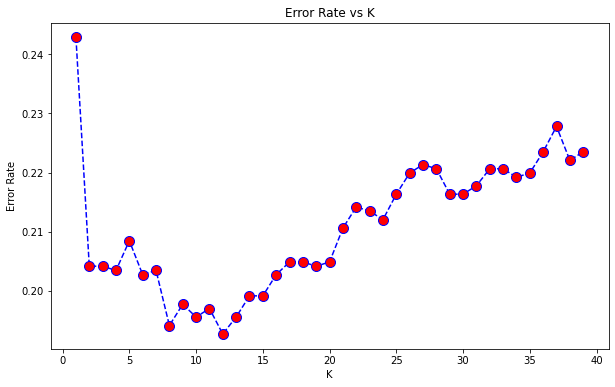

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
print(metrics.accuracy_score(y_test, pred))

0.8073065902578797


## prediction of Employee Leaving Or Not using randomforest classifier

In [ ]:
forest= RandomForestClassifier(n_estimators =10, random_state = 0)
forest.fit(X_train,y_train)  
y_pred = forest.predict(X_test)
forest.score(X_test,y_test)

0.8087392550143266

### Prediction of Employee LeavingOrNot using Logistic regression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
pred = logmodel.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       926
           1       0.69      0.44      0.54       470

    accuracy                           0.74      1396
   macro avg       0.73      0.67      0.68      1396
weighted avg       0.74      0.74      0.73      1396

[[834  92]
 [264 206]]


In [ ]:
logmodel.score(X_test,y_test)

0.7449856733524355

## using support vector classifier

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[868,  58],
       [209, 261]], dtype=int64)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       926
           1       0.82      0.56      0.66       470

    accuracy                           0.81      1396
   macro avg       0.81      0.75      0.76      1396
weighted avg       0.81      0.81      0.80      1396



In [ ]:
print(accuracy_score(y_test, y_pred))

0.8087392550143266


In [ ]:
svm_f1 = f1_score(y_test, y_pred)
svm_acc = accuracy_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_auc = roc_auc_score(y_test, y_pred)

In [ ]:
svm_f1

0.7404674046740467

In [ ]:
svm_acc

0.8488538681948424

## DecisionTree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[795, 131],
       [170, 300]], dtype=int64)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       926
           1       0.70      0.64      0.67       470

    accuracy                           0.78      1396
   macro avg       0.76      0.75      0.75      1396
weighted avg       0.78      0.78      0.78      1396



In [ ]:
print(accuracy_score(y_test, y_pred))

0.7843839541547278


# Hyper parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [ ]:
dtc = grid_search.best_estimator_
y_pred = dtc.predict(X_test) 

In [ ]:
print(accuracy_score(y_test, y_pred))

0.8359598853868195


In [ ]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 7}
0.8412649722465673


# Boosting: ADA boost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 10, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=7,
                                                                                min_samples_leaf=3,
                                                                                min_samples_split=7)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}
0.8547692307692307


In [ ]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME.R', learning_rate = 0.001, n_estimators = 200)
ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=7,
                                                         min_samples_leaf=3,
                                                         min_samples_split=7),
                   learning_rate=0.001, n_estimators=200)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[873,  53],
       [176, 294]], dtype=int64)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       926
           1       0.85      0.63      0.72       470

    accuracy                           0.84      1396
   macro avg       0.84      0.78      0.80      1396
weighted avg       0.84      0.84      0.83      1396



# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search = GridSearchCV(gb, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [ ]:
# best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 200}
0.8520049381319914


In [ ]:
gb = GradientBoostingClassifier(learning_rate = 0.1, loss = 'deviance', n_estimators = 180)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test) 

In [ ]:
print(accuracy_score(y_test, y_pred))

0.8467048710601719


## Stochastic Gradient Boosting (SGB)

In [ ]:
sgbc = GradientBoostingClassifier(learning_rate = 0.1, subsample = 0.9, max_features = 0.75, loss = 'deviance',
                                  n_estimators = 100)
sgbc.fit(X_train, y_train)
y_pred = sgbc.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.839541547277937


## Cat boost Classifier

In [ ]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations = 180, learning_rate = 0.1)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)

0:	learn: 0.6498342	total: 138ms	remaining: 24.7s
1:	learn: 0.6184705	total: 139ms	remaining: 12.4s
2:	learn: 0.5936824	total: 140ms	remaining: 8.26s
3:	learn: 0.5669537	total: 141ms	remaining: 6.19s
4:	learn: 0.5426296	total: 141ms	remaining: 4.95s
5:	learn: 0.5283035	total: 142ms	remaining: 4.12s
6:	learn: 0.5104739	total: 143ms	remaining: 3.53s
7:	learn: 0.4942012	total: 144ms	remaining: 3.09s
8:	learn: 0.4829274	total: 144ms	remaining: 2.74s
9:	learn: 0.4727102	total: 145ms	remaining: 2.46s
10:	learn: 0.4613607	total: 146ms	remaining: 2.24s
11:	learn: 0.4537629	total: 146ms	remaining: 2.05s
12:	learn: 0.4451525	total: 147ms	remaining: 1.89s
13:	learn: 0.4385192	total: 148ms	remaining: 1.75s
14:	learn: 0.4320629	total: 149ms	remaining: 1.63s
15:	learn: 0.4257983	total: 149ms	remaining: 1.53s
16:	learn: 0.4212931	total: 150ms	remaining: 1.44s
17:	learn: 0.4182314	total: 151ms	remaining: 1.36s
18:	learn: 0.4153645	total: 151ms	remaining: 1.28s
19:	learn: 0.4116171	total: 152ms	remaini

In [ ]:
print(accuracy_score(y_test, y_pred))

0.8488538681948424


# XGB Classifier

In [ ]:
print(accuracy_score(y_test, y_pred))

0.8488538681948424


## Feature Importance

In [ ]:
feature = pd.Series(forest.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

JoiningYear                  0.339862
Age                          0.172173
PaymentTier                  0.107950
Education_Masters            0.095057
ExperienceInCurrentDomain    0.082334
Gender_Male                  0.073182
City_Pune                    0.068750
City_New Delhi               0.030009
EverBenched_Yes              0.018764
Education_PHD                0.011918
dtype: float64


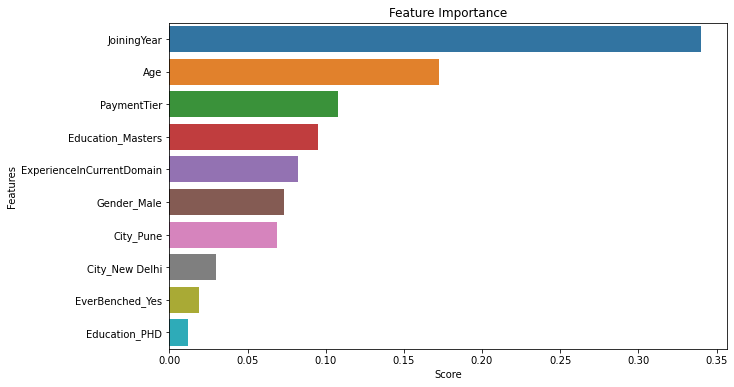

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()